In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step


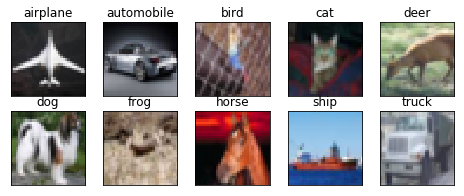

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_120 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_121 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 11s 27ms/step - loss: 1.8269 - acc: 0.2957 - val_loss: 1.3841 - val_acc: 0.4848
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.3249 - acc: 0.5196 - val_loss: 1.1069 - val_acc: 0.6052
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.0908 - acc: 0.6136 - val_loss: 1.0238 - val_acc: 0.6370
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9622 - acc: 0.6648 - val_loss: 0.8245 - val_acc: 0.7191
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8627 - acc: 0.7022 - val_loss: 0.7562 - val_acc: 0.7356
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7960 - acc: 0.7284 - val_loss: 0.7190 - val_acc: 0.7522
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7293 - acc: 0.7505 - val_loss: 0.6810 - val_acc: 0.7679
Epoch 8/100
390/390 [==============================] - 9s 23m

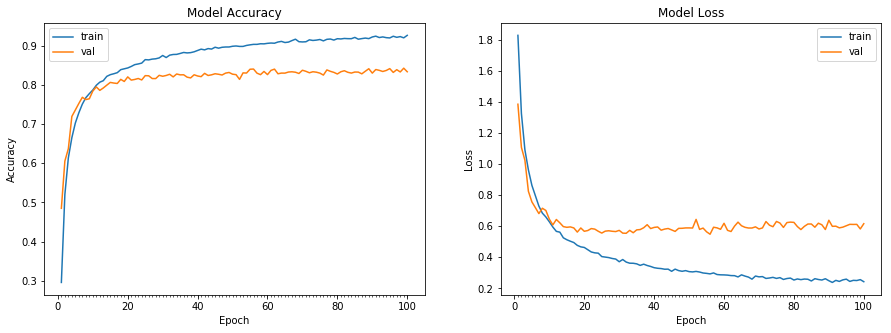

Accuracy on test data is: 83.31


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.31

In [0]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/EVA/assgn6_cifar10-base-model.h5")

## NEW model with some changes 

* remove dense , add layers required to reach RF*
* fix kernel scaleup and down (1x1),see if all dropouts are properly placed*
* Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same'," *

In [0]:

from keras.layers.convolutional import SeperableConvolution2D
from keras.layers import concatenate

In [0]:

model = Sequential()

#1.Normal Convolution
l1 =model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32x32 x48
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3)) # 30x30 x48
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #15 x15 x48


#2. Spatially Separable Conv
#(Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
first= model.add(Convolution2d(96,3,1,border_mode= 'same')) 
second = model.add(Convolution2D(120,1,3,border_mode='same') # number of channels  can increase/remain same also
merge = model.add(concatenate([first,second])
model.add(Activation('relu'))
model.add(Dropout(0.15))



#3. Depthwise separable Conv
model.add(SeparableConv2D(198, 3,3, strides=(1, 1), padding='valid'))

#use concatenate to merge 2 layers

#4. Grouped convultion with dilaton 1
g1= model.add(Convolution2D(merge, 3, 3, border_mode='same',dilation_rate=1)) #15x15 x96
g2= model.add(Convolution2D(merge, 5, 5)) # 13x13 x96
gall_1 = model.add(concatenate([g1,g2]))                 
model.add(Activation('relu'))
model.add(Dropout(0.15))

             

model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96

                  
#MAx pooling leads to reduction in size, check  size before concatenating with previous layers                   


                  
#5. Grouped convultion with dilation 2                  
g3 = model.add(Convolution2D(gall_1, 3, 3, border_mode='same',dilation_rate=2)) #6x6x192
g4 = model.add(Convolution2D(gall_1, 5,5)) #4x4x192
gall_2 = model.concatenate([g3,g4])                  
model.add(Activation('relu'))
model.add(Dropout(0.15))


model.add(Convolution2D(10, 4, 4))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, 1, border_mode='same'))
#model.add(Dropout(0.5))


model.add(Flatten())
model.add(Activation('softmax'))

#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_135 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_136 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 15, 15, 96)        41568     
_________________________________________________________________
activation_137 (Activation)  (None, 15, 15, 96)        0         
__________

Epoch 1/99
  7/781 [..............................] - ETA: 16s - loss: 1.8381 - acc: 0.3304

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=99)`
  if sys.path[0] == '':


781/781 [==============================] - 12s 15ms/step - loss: 1.6016 - acc: 0.4180 - val_loss: 1.2598 - val_acc: 0.5523
Epoch 2/99
781/781 [==============================] - 12s 15ms/step - loss: 1.3373 - acc: 0.5230 - val_loss: 1.0915 - val_acc: 0.6226
Epoch 3/99
781/781 [==============================] - 12s 15ms/step - loss: 1.1890 - acc: 0.5738 - val_loss: 0.9625 - val_acc: 0.6757
Epoch 4/99
781/781 [==============================] - 12s 15ms/step - loss: 1.0858 - acc: 0.6137 - val_loss: 0.9023 - val_acc: 0.6871
Epoch 5/99
781/781 [==============================] - 12s 15ms/step - loss: 1.0127 - acc: 0.6412 - val_loss: 0.8552 - val_acc: 0.7120
Epoch 6/99
781/781 [==============================] - 12s 15ms/step - loss: 0.9535 - acc: 0.6646 - val_loss: 0.8243 - val_acc: 0.7190
Epoch 7/99
781/781 [==============================] - 12s 15ms/step - loss: 0.8931 - acc: 0.6825 - val_loss: 0.8234 - val_acc: 0.7278
Epoch 8/99
781/781 [==============================] - 12s 15ms/step - los

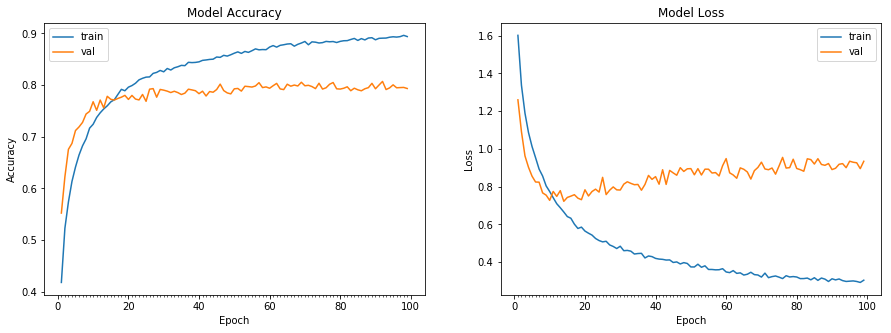

Accuracy on test data is: 79.34


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/20
  7/781 [..............................] - ETA: 17s - loss: 0.4883 - acc: 0.8438

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=20)`
  This is separate from the ipykernel package so we can avoid doing imports until


781/781 [==============================] - 12s 15ms/step - loss: 0.4001 - acc: 0.8598 - val_loss: 0.6975 - val_acc: 0.8031
Epoch 2/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3922 - acc: 0.8624 - val_loss: 0.6810 - val_acc: 0.8093
Epoch 3/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3902 - acc: 0.8629 - val_loss: 0.7158 - val_acc: 0.8042
Epoch 4/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3957 - acc: 0.8599 - val_loss: 0.6915 - val_acc: 0.8120
Epoch 5/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3964 - acc: 0.8592 - val_loss: 0.7179 - val_acc: 0.8052
Epoch 6/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3819 - acc: 0.8656 - val_loss: 0.6987 - val_acc: 0.8069
Epoch 7/20
781/781 [==============================] - 12s 15ms/step - loss: 0.3921 - acc: 0.8642 - val_loss: 0.7122 - val_acc: 0.7950
Epoch 8/20
781/781 [==============================] - 12s 15ms/step - los

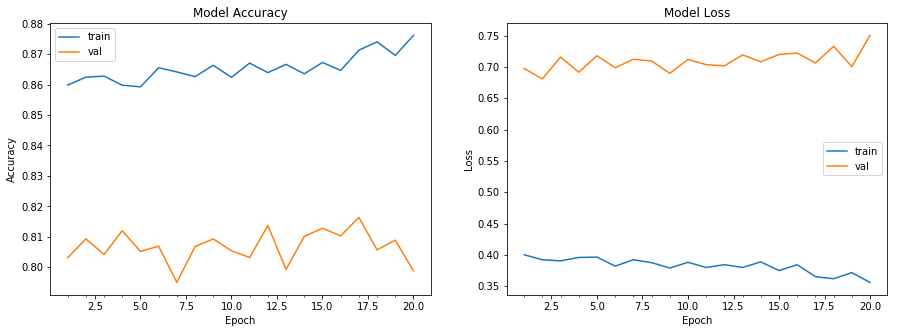

Accuracy on test data is: 79.88


In [0]:
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#load model 


from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/EVA/assgn6_cifar10-model.h5")